In [ ]:
import numpy as np

In [59]:
fname= 'ASTR19_S22_group_project_data.txt'
f = open(fname,'r')
#print(f.name)
test_data = f.readlines()
f.close()
#print(test_data)
del test_data[0:3]
#print(test_data)

MIN = []
HRS = []
HEIGHT = []
DAYS = []
TIME = []

for i in range(0,len(test_data)):
    a = test_data[i]
    a = a.split()
    b = a[1]
    b= b.split(':')
    #print(b)
    #print(a)
    DAYS.append(float(a[0]))
    HRS.append(float(b[0]))
    MIN.append(float(b[1]))
    HEIGHT.append(float(a[2]))
    #The time in hours is equal to the ((HRS + (MIN/60))+24(DAYS-1))
    #DAYS is the number of days passed
    y = (HRS[i] + (MIN[i]/60))+ 24.0*((DAY[i])-1.0)
    TIME.append(y)

Text(0, 0.5, 'HEIGHT')

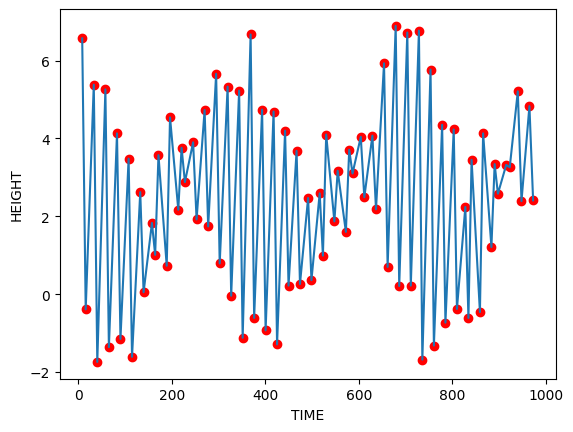

In [62]:
import matplotlib.pyplot as plt
fig = plt.figure
plt.plot(TIME,HEIGHT)
plt.scatter(TIME,HEIGHT,c="red")
plt.xlabel('TIME')
plt.ylabel('HEIGHT')